# Name: FAHMIDA FATHIMA
    
SkillCraft

Mini Project: Dog/Cats Dataset

Course For Internship: Machine Learning Program

# Task 3

Implement a support vector machine (SVM) to classify images of cats and dogs from the Kaggle dataset.

Dog/Cats Dataset

SkillCraft Technology   

# 1. Introduction to SVM 

Used SVM to build and train a model using human cell records, and classify cells to whether the samples are benign (mild state) or malignant (evil state).

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not otherwise linearly separable (This gets done by kernel function of SVM classifier). A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane.


# 2. Necessary imports
Import essential libraries such as pandas and numpy for data handling and manipulation. Use matplotlib and seaborn for visualization. Include sklearn modules like train_test_split for dataset division and SVM for modeling. Ensure warnings is imported to suppress unnecessary messages. These imports streamline data analysis and machine learning tasks.

# 3. About the Cancer data
The cancer dataset typically includes attributes describing tumors (e.g., mean radius, texture). It helps differentiate between benign and malignant tumors. It is widely used for classification problems. Data is usually structured with rows representing samples and columns as features. Often, it is preloaded in sklearn.datasets.


# 4. Load Data From CSV File 
The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.

The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).


# 5. Distribution of the classes
Analyze the target column to understand class distribution (e.g., benign vs. malignant). Use visualizations like bar plots or pie charts for better comprehension. Check for imbalance, which can affect the model's performance. Use value_counts() to determine exact counts of each class. Class distribution guides preprocessing decisions.



# 6. Selection of unwanted columns
Identify irrelevant or redundant features that don't contribute to classification. Examples may include IDs or metadata columns. Perform exploratory data analysis (EDA) to detect low-variance features. Check feature importance or correlation matrices to guide selection. Dropping these columns reduces noise and improves model performance.

# 7. Remove unwanted columns
Use drop() method in pandas to exclude irrelevant columns. This step simplifies data and accelerates model training. Ensure necessary columns remain intact for meaningful predictions. Verify changes by inspecting the dataset's shape after dropping. Removed columns are non-informative and can hinder accuracy.


# 8. Divide the data as Train/Test dataset
Split the dataset into training and testing sets using train_test_split. Typically, allocate 70-80% of data for training and the rest for testing. Maintain class distribution with stratification to avoid bias. Set a random seed for reproducibility. This split evaluates the model's performance on unseen data.


# 9. Modeling (SVM with Scikit-learn)
Use the SVC class from sklearn.svm for building the SVM model. Fit the training dataset and tune hyperparameters (e.g., kernel, C). Choose appropriate kernel functions like 'linear' or 'rbf' based on data complexity. SVM is effective for classification problems, especially in high-dimensional spaces. Evaluate on test data after training.

# 10. Evaluation (Results)
Assess the model using metrics like accuracy, precision, recall, and F1-score. Generate a classification report and confusion matrix for detailed insights. Visualize results with plots like ROC curves to understand performance. Compare results to baseline models to gauge improvement. Interpret results to refine the model further.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
#4. Load Data From CSV File 
cell_df=pd.read_csv("C:\\Users\\Famida\\Desktop\\cell_samples.csv")
cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

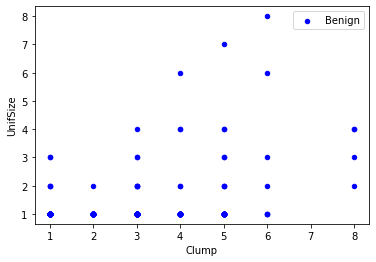

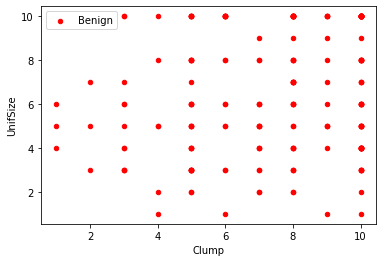

In [11]:
#5. Distribution of the classes
benign_df = cell_df[cell_df['Class']==2][0:200]

malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benign')

#help(benign_df.plot)

<AxesSubplot:xlabel='Clump', ylabel='UnifSize'>

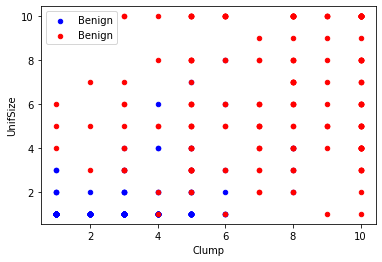

In [12]:
benign_df = cell_df[cell_df['Class']==2][0:200]

malignant_df = cell_df[cell_df['Class']==4][0:200]

axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')

malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='red', label='Benign', ax=axes)

#help(benign_df.plot)

In [13]:
#6. Selection of unwanted columns
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [14]:
cell_df.dtypes
cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()] 
cell_df['BareNuc'] = cell_df['BareNuc'].astype('int')

cell_df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int32
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [15]:
#7. Remove unwanted columns
cell_df.columns


Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [18]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# cell_df 100 rows and 11 columns,

#picked 9 columns out of 11

# Independent var

X = np.asarray(feature_df)

# dependent variable

y = np.asarray(cell_df['Class'])

X[0:5]


array([[ 5,  1,  1,  1,  2,  1,  3,  1,  1],
       [ 5,  4,  4,  5,  7, 10,  3,  2,  1],
       [ 3,  1,  1,  1,  2,  2,  3,  1,  1],
       [ 6,  8,  8,  1,  3,  4,  3,  7,  1],
       [ 4,  1,  1,  3,  2,  1,  3,  1,  1]], dtype=int64)

In [19]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

# cell_df 100 rows and 11 columns,

#picked 9 columns out of 11

# Independent var

X = np.asarray(feature_df)

# dependent variable

y = np.asarray(cell_df['Class'])

y[0:5]


array([2, 2, 2, 2, 2], dtype=int64)

In [20]:
#8. Divide the data as Train/Test dataset

In [23]:
'''
cell_df (100) --> Train (80 rows) / Test (20 rows)

Train(x, y) ## X itself is a 2D array. ##y is 10

Test(x,y)
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

X_train.shape

(546, 9)

In [27]:

'''
cell_df (100) --> Train (80 rows) / Test (20 rows)

Train(x, y) ## X itself is a 2D array. ##y is 10

Test(x,y)
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#546 x 9

X_train.shape

#546 x 1

y_train.shape

#137 x 9
X_test.shape

#137 x 1

y_test.shape

(137,)

# 9. Modeling (SVM with Scikit-learn)
The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.Linear

2.Polynomial

3.Radial basis function (RBF)

4.Sigmoid

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset, we usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function) for this lab.

In [29]:
from sklearn import svm

svm.SVC(kernel='linear')

SVC(kernel='linear')

In [30]:
from sklearn import svm
'''

Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
|
|         Current default is 'auto' which uses (1 / n_features), 
|         if `gamma='scale'` is passed then it uses 1 / (n_features * X.var()) 
|         as value of gamma.
'''

svm.SVC(kernel='linear', gamma='auto', C=2)


SVC(C=2, gamma='auto', kernel='linear')

In [31]:
from sklearn import svm
'''

Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
|
|         Current default is 'auto' which uses (1 / n_features), 
|         if `gamma='scale'` is passed then it uses 1 / (n_features * X.var()) 
|         as value of gamma.
'''

classifier=svm.SVC(kernel='linear', gamma='auto', C=2)
classifier.fit(X_train,y_train)

y_predict=classifier.predict(X_test)

In [32]:
#10. Evaluation (Results)

In [33]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137




# Cat And Dog Image Classification Using SVM

# Introduction

What is Image classification? Image classification is the process of categorizing and labeling groups of pixels or vectors within an image based on specific rules. The categorization law can be devised using one or more spectral or textural characteristics.

Different image classification techniques:

In [15]:
import numpy
import scipy

print(f"NumPy version: {numpy.__version__}")
print(f"SciPy version: {scipy.__version__}")


NumPy version: 1.22.4
SciPy version: 1.7.3


In [16]:
import tensorflow.keras as keras


In [17]:
import tensorflow as tf

print(tf.__version__)


2.18.0


In [18]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [19]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

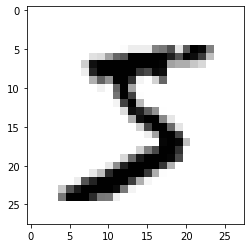

In [20]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [21]:
print(y_train[0])

5


In [22]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

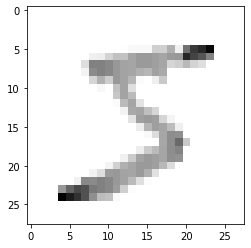

In [23]:
print(x_train[0])

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [27]:
model = tf.keras.models.Sequential()

In [28]:
model.add(tf.keras.layers.Flatten())

In [29]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))

In [30]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [31]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8584 - loss: 0.5240
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9530 - loss: 0.1574
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9703 - loss: 0.1016


In [33]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9632 - loss: 0.1142
0.10243364423513412
0.9678000211715698


In [39]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9

In [40]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()   # 28x28 numbers of 0-9
x_train = tf.keras.utils.normalize(x_train, axis=1).reshape(x_train.shape[0], -1)
x_test = tf.keras.utils.normalize(x_test, axis=1).reshape(x_test.shape[0], -1)

model = tf.keras.models.Sequential()
#model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))   #10 because dataset is numbers from 0 - 9

In [36]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays

mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8677 - loss: 0.4648
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9674 - loss: 0.1059
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9784 - loss: 0.0713
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9650 - loss: 0.1184
0.10400794446468353
0.9682000279426575


In [41]:
model.save('epic_num_reader.keras')

In [44]:
x_test_flattened = x_test.reshape(x_test.shape[0], -1)


In [45]:
x_test_flattened = x_test_flattened.astype('float32')


# Dog vs Cats Dataset

# Cats vs Dogs Image Classifier
# Overview:
This project involves building a machine learning model to classify images as either cats or dogs. It uses a well-known dataset from Kaggle, where the task is to distinguish between images of cats and dogs. The model is trained using deep learning techniques, with an emphasis on leveraging transfer learning from a pre-trained network (InceptionV3) to achieve high accuracy.

# Key Features:
# Data Preprocessing:
The dataset consists of 25,000 images of cats and dogs, which are divided into training and validation sets. The data is augmented to introduce variations in lighting, rotation, and zoom to improve generalization.

# Model Architecture:
The model uses InceptionV3 as the base, with its layers frozen, and custom layers are added on top for binary classification (cat or dog).

# Transfer Learning:
By utilizing a pre-trained model, the system can benefit from a robust set of features learned on large datasets like ImageNet, improving classification performance. Callbacks: Early stopping and model checkpointing are employed to prevent overfitting and save the best-performing model.

# Evaluation:
The model's performance is visualized using training and validation accuracy/loss plots to track the progress.

# Test Predictions:
After training, the model is used to make predictions on unseen test images, and the results are stored in a CSV file for submission.

# Description:
The project was motivated by the "Dogs vs Cats" Kaggle competition, where the challenge is to develop an algorithm that can distinguish between images of cats and dogs. The dataset is highly diverse, with varying backgrounds, lighting, and poses, making the task challenging for machine learning models. By using advanced image recognition techniques such as Convolutional Neural Networks (CNNs) and Transfer Learning, the project aims to achieve high accuracy in classifying images, even with a large and varied dataset.

The dataset comes from Microsoft Research’s collaboration with Petfinder.com, which provided over three million images of cats and dogs. This competition has become a standard benchmark for image classification tasks in computer vision.

# Approach:
# Data Preprocessing:
Images are resized to 150x150 pixels, and the dataset is split into training and validation sets. Data augmentation techniques are used to artificially expand the dataset and improve model performance.

# Model Building:
InceptionV3 is used as a feature extractor, with custom fully connected layers added for the final classification task. The model is compiled with binary cross-entropy loss and accuracy as the evaluation metric.

# Model Training:
The model is trained for 20 epochs with callbacks to prevent overfitting and save the best model.

# Evaluation and Prediction:
After training, the model's performance is evaluated using training and validation accuracy/loss plots, and predictions on the test set are made and saved in a CSV file.

This project highlights the power of deep learning and transfer learning in solving real-world image classification problems, and can serve as a foundation for more complex computer vision tasks in the future.


In [37]:
!python --version


Python 3.9.12


In [3]:
import sys
print(sys.version)


3.9.12 (main, Apr  4 2022, 05:22:27) [MSC v.1916 64 bit (AMD64)]


In [1]:
!pip install opencv-python


  Using cached opencv_python-4.10.0.84-cp37-abi3-win_amd64.whl (38.8 MB)


In [2]:
import cv2

print(cv2.__version__)


4.10.0


In [3]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt
import pickle

In [5]:

DIRECTORY = r'C:\Users\Famida\Downloads\archive\dogscats\valid'

CATEGORIES=['cat','dog']

In [6]:
for category in CATEGORIES:
    

    folder = os.path.join(DIRECTORY, category)

    print(folder)

C:\Users\Famida\Downloads\archive\dogscats\valid\cat
C:\Users\Famida\Downloads\archive\dogscats\valid\dog


In [10]:
CATEGORIES = ['cat', 'dog']  # Ensure these match the folder names


In [11]:
print(folder)


C:\Users\Famida\Downloads\archive\dogscats\valid\cat


In [12]:
import os
print(os.path.exists(DIRECTORY))  # Should return True if the directory exists


True


In [13]:
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    print(folder, os.path.exists(folder))


C:\Users\Famida\Downloads\archive\dogscats\valid\cat False
C:\Users\Famida\Downloads\archive\dogscats\valid\dog False


In [15]:
import os
DIRECTORY = r'C:\Users\Famida\Downloads\archive\dogscats\valid'
print(os.path.exists(DIRECTORY))  # Should return True


True


In [16]:
CATEGORIES = ['cat', 'dog']
for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    print(folder, os.path.exists(folder))  # Should return True for each category


C:\Users\Famida\Downloads\archive\dogscats\valid\cat False
C:\Users\Famida\Downloads\archive\dogscats\valid\dog False


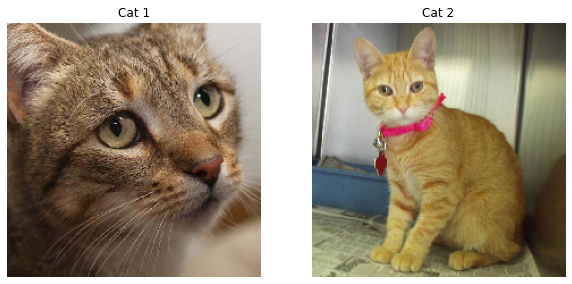

Batch shape: (2, 224, 224, 3)


In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the images
img1 = tf.keras.utils.load_img("C:\\Users\\Famida\\Desktop\\archive\\dogscats\\dogscats\\train\\cats\\cat.54.jpg", target_size=(224, 224))  # Resize to (224, 224) for models like VGG, ResNet
img2 = tf.keras.utils.load_img("C:\\Users\\Famida\\Desktop\\archive\\dogscats\\dogscats\\train\\cats\\cat.3663.jpg", target_size=(224, 224))

# Convert images to arrays
img1_array = tf.keras.utils.img_to_array(img1) / 255.0  # Normalize pixel values to [0, 1]
img2_array = tf.keras.utils.img_to_array(img2) / 255.0

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Cat 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Cat 2")
plt.axis('off')

plt.show()

# Stack into a batch for machine learning (e.g., training data)
images = tf.stack([img1_array, img2_array])  # Shape: (2, 224, 224, 3)
print("Batch shape:", images.shape)


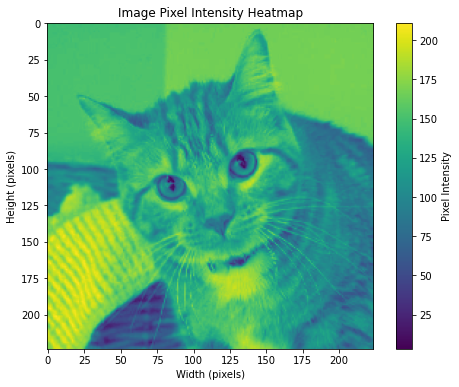

In [33]:
import tensorflow as tf
import matplotlib.pyplot as plt

# File path
file_path = r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\cats\cat.194.jpg"

# Load the image and convert it to an array
img = tf.keras.utils.load_img(file_path, target_size=(224, 224))  # Resize to (224, 224)
img_array = tf.keras.utils.img_to_array(img)  # Shape: (224, 224, 3)

# Select one channel (e.g., Red) or convert to grayscale for a single 2D graph
gray_img = tf.image.rgb_to_grayscale(img_array).numpy().squeeze()  # Convert to grayscale and squeeze to 2D

# Plot the grayscale image as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis")  # Use a colormap to enhance the visualization
plt.colorbar(label="Pixel Intensity")  # Add a colorbar to indicate intensity values
plt.title("Image Pixel Intensity Heatmap")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()


In [3]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


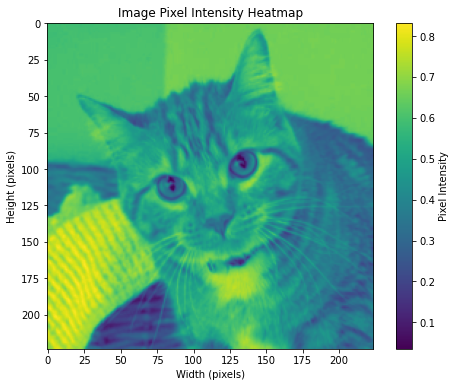

In [4]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# File path
file_path = r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\cats\cat.194.jpg"

# Define transformations (resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to (224, 224)
    transforms.ToTensor()          # Convert to tensor
])

# Load the image
img = Image.open(file_path)
img_tensor = transform(img)

# Convert to grayscale for single-channel visualization
gray_img = img_tensor.mean(dim=0).numpy()  # Average over RGB channels to create a grayscale image

# Plot the grayscale image as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis")  # Use a colormap
plt.colorbar(label="Pixel Intensity")  # Add a colorbar
plt.title("Image Pixel Intensity Heatmap")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()


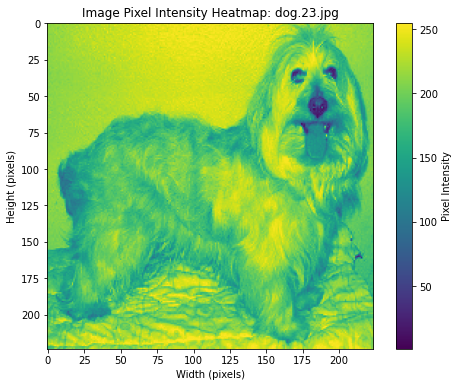

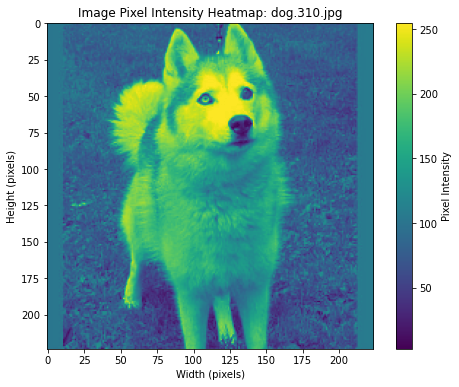

In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

# File paths
file_paths = [
    r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.23.jpg",
    r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.310.jpg"
]

# Loop through each file and generate a heatmap
for file_path in file_paths:
    # Load the image and convert it to an array
    img = tf.keras.utils.load_img(file_path, target_size=(224, 224))  # Resize to (224, 224)
    img_array = tf.keras.utils.img_to_array(img)  # Convert to an array, shape: (224, 224, 3)

    # Convert to grayscale
    gray_img = tf.image.rgb_to_grayscale(img_array).numpy().squeeze()  # Convert to 2D array (grayscale)

    # Extract the file name for the title
    file_name = file_path.split("\\")[-1]  # Extract the file name safely

    # Plot the grayscale image as a heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(gray_img, cmap="viridis")  # Use a colormap for visualization
    plt.colorbar(label="Pixel Intensity")  # Add a colorbar to indicate intensity values
    plt.title(f"Image Pixel Intensity Heatmap: {file_name}")  # Use the extracted file name
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.show()


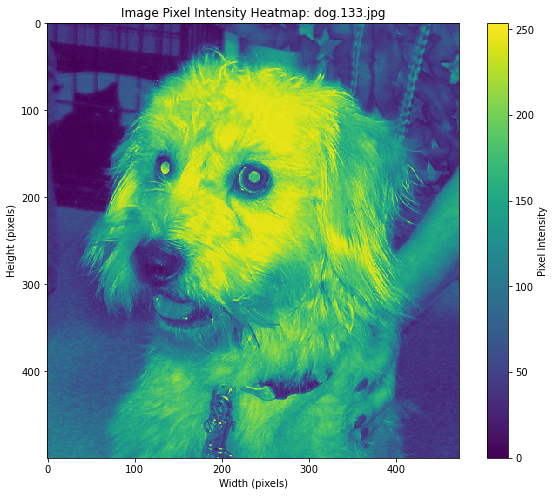

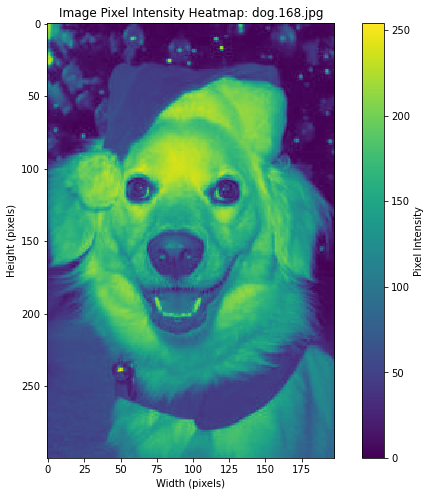

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# File paths
file_paths = [
    r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.133.jpg",
    r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.168.jpg"
]

# Loop through each file and generate a heatmap
for file_path in file_paths:
    # Load the image and convert it to an array (no resizing to avoid blurriness)
    img = tf.keras.utils.load_img(file_path)  # Load the image in its original size
    img_array = tf.keras.utils.img_to_array(img)  # Convert to an array, shape: (H, W, 3)

    # Convert to grayscale
    gray_img = tf.image.rgb_to_grayscale(img_array).numpy().squeeze()  # Convert to 2D grayscale array

    # Extract the file name for the title
    file_name = file_path.split("\\")[-1]  # Extract the file name

    # Plot the grayscale image as a heatmap (use "nearest" interpolation for clarity)
    plt.figure(figsize=(10, 8))  # Increase figure size for better resolution
    plt.imshow(gray_img, cmap="viridis", interpolation="nearest")  # Prevent blurring with "nearest"
    plt.colorbar(label="Pixel Intensity")  # Add a colorbar to indicate intensity values
    plt.title(f"Image Pixel Intensity Heatmap: {file_name}")  # Use the extracted file name
    plt.xlabel("Width (pixels)")
    plt.ylabel("Height (pixels)")
    plt.show()


In [9]:
import os

import numpy as np
import pandas

import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling, BatchNormalization, GlobalAveragePooling2D, RandomFlip, RandomRotation, RandomZoom, RandomCrop, RandomContrast, RandomBrightness
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom, RandomHeight, RandomWidth
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import matplotlib.image as mpimg
import random

In [10]:
print("GPU: ", len(tf.config.experimental.list_physical_devices('GPU')))
os.environ['XLA_FLAGS'] = '--xla_gpu_cuda_data_dir=/usr/lib/cuda'

GPU:  0


In [11]:
%matplotlib inline

In [14]:
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"
VAL_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\valid"


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Paths to your datasets
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"
VAL_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\valid"
SIZE = 224  # Image size

# Data augmentation for training
train_datagenerator = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Train generator
train = train_datagenerator.flow_from_directory(
    TRAIN_PATH,
    target_size=(SIZE, SIZE),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb'
)

# Validation generator
test_datagenerator = ImageDataGenerator(preprocessing_function=preprocess_input)
validation = test_datagenerator.flow_from_directory(
    VAL_PATH,
    target_size=(SIZE, SIZE),
    batch_size=64,
    class_mode='categorical',
    color_mode='rgb'
)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
import os
print("Train Path Exists:", os.path.exists(TRAIN_PATH))
print("Validation Path Exists:", os.path.exists(VAL_PATH))


Train Path Exists: True
Validation Path Exists: True


In [18]:
import os
TRAIN_PATH = os.path.join("C:", "Users", "Famida", "Desktop", "archive", "dogscats", "train")
VAL_PATH = os.path.join("C:", "Users", "Famida", "Desktop", "archive", "dogscats", "valid")


In [12]:
TRAIN_PATH = Path("./datasets/catdog/train/")
VAL_PATH = Path("./datasets/catdog/valid/")

SIZE = 150
CLASSES = "cats", "dogs"

In [22]:
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"


In [23]:
print(TRAIN_PATH)


C:\Users\Famida\Desktop\archive\dogscats\train


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


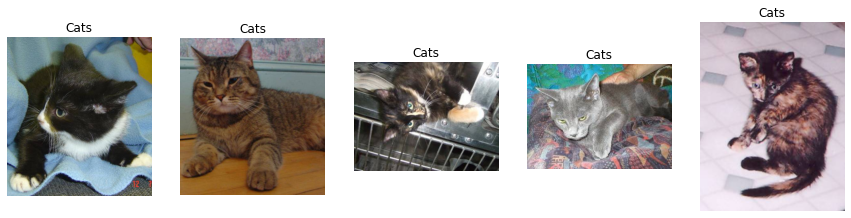

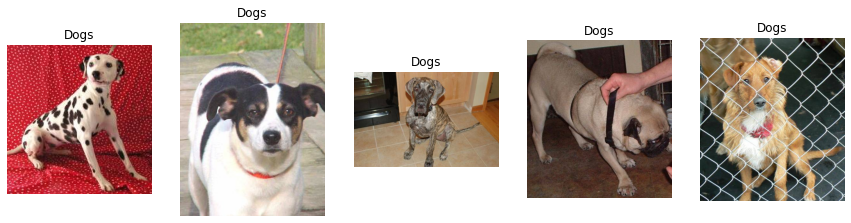

In [24]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Create a new figure for each category
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(image_files, 1):
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, num_images, i)  # Arrange in a row of `num_images`
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}")
            
            # Display the images for the current category
            plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=5)


# Model Building

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

# Define input size
SIZE = 224

# Use a pre-trained VGG16 model as the base
base_model = VGG16(include_top=False, input_shape=(SIZE, SIZE, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # For 2 classes: cats and dogs
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [11]:
from tensorflow.keras.applications.vgg16 import preprocess_input


In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define paths
TRAIN_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\train'
VAL_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\valid'

# Define image size
SIZE = 224

# Data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # Preprocessing for VGG16
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load training and validation data
train_data = train_datagen.flow_from_directory(
    TRAIN_PATH, 
    target_size=(SIZE, SIZE), 
    batch_size=32, 
    class_mode='categorical'
)

val_data = val_datagen.flow_from_directory(
    VAL_PATH, 
    target_size=(SIZE, SIZE), 
    batch_size=32, 
    class_mode='categorical'
)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

# Example model
SIZE = 224
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))
model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dense(2, activation='softmax')  # Assuming binary classification (e.g., cats and dogs)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Paths
TRAIN_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\train'
VAL_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\valid'

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Load Data
train_data = train_datagen.flow_from_directory(
    TRAIN_PATH, target_size=(SIZE, SIZE), batch_size=32, class_mode='categorical'
)
val_data = val_datagen.flow_from_directory(
    VAL_PATH, target_size=(SIZE, SIZE), batch_size=32, class_mode='categorical'
)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [ ]:
# Train the model
history = model.fit(
    train_data, 
    epochs=10, 
    validation_data=val_data
)


Epoch 1/10
  8/719 ━━━━━━━━━━━━━━━━━━━━ 7:36:16 39s/step - accuracy: 0.4275 - loss: 201.6187

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Accuracy over train epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Display the graph
plt.show()


In [4]:
DIRECTORY = r'C:\Users\Famida\Downloads\archive\dogscats\valid'


In [5]:
import os
import cv2
import matplotlib.pyplot as plt

# Define the main directory
DIRECTORY = r'C:\Users\Famida\Downloads\archive\dogscats\valid'
CATEGORIES = ['cat', 'dog']  # Ensure these match your folder names

for category in CATEGORIES:
    folder = os.path.join(DIRECTORY, category)
    
    # Check if the folder exists
    if not os.path.exists(folder):
        print(f"Folder not found: {folder}")
        continue  # Skip to the next category if the folder is missing

    # Iterate over images in the folder
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)

        # Check if the image was loaded correctly
        if img_arr is None:
            print(f"Could not load image: {img_path}")
            continue

        # Display the first image in the folder
        plt.imshow(cv2.cvtColor(img_arr, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
        plt.axis("off")
        plt.title(f"Sample Image from {category}")
        break  # Only show the first image in the folder
    plt.show()


Folder not found: C:\Users\Famida\Downloads\archive\dogscats\valid\cat
Folder not found: C:\Users\Famida\Downloads\archive\dogscats\valid\dog


In [6]:
for root, dirs, files in os.walk(DIRECTORY):
    print(f"Root: {root}")
    print(f"Dirs: {dirs}")
    print(f"Files: {files}")


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import VGG16

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Create the sequential model
model = Sequential([
    base_model,                # Add the base pre-trained model
    Flatten(),                 # Flatten the output of the base model
    Dense(256, activation='relu'),  # Fully connected layer
    Dense(2, activation='softmax')  # Output layer (2 classes: cat, dog)
])

# Freeze the layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

print("Model defined and compiled successfully!")


Model defined and compiled successfully!


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

# Define paths to the dataset
TRAIN_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\train'
VAL_PATH = r'C:\Users\Famida\Desktop\archive\dogscats\valid'

# Initialize data generators
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_datagen.flow_from_directory(
    TRAIN_PATH, target_size=(224, 224), batch_size=32, class_mode='categorical'
)
val_data = val_datagen.flow_from_directory(
    VAL_PATH, target_size=(224, 224), batch_size=32, class_mode='categorical'
)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
from tensorflow.keras.callbacks import Callback

model_weights_at_epochs = {}

class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        model_weights_at_epochs[epoch] = self.model.get_weights()


In [7]:
SIZE = 224  # Or any other value that fits your needs (e.g., 128, 256)


In [9]:
CATEGORIES = ['cat', 'dog']  # Example categories; adjust based on your dataset


In [10]:
layers.Dense(len(CATEGORIES), activation='softmax')


<Dense name=dense_1, built=False>

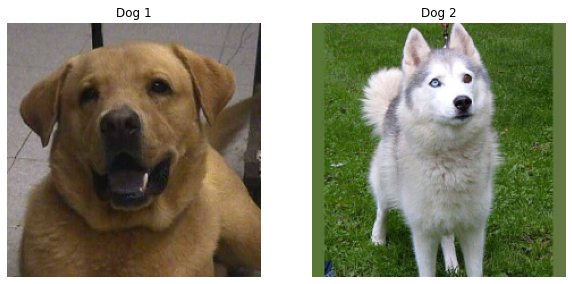

Batch shape: (2, 224, 224, 3)


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the images (update paths for dog images)
img1 = tf.keras.utils.load_img("C:\\Users\\Famida\\Desktop\\archive\\dogscats\\dogscats\\train\\dogs\\dog.12384.jpg", target_size=(224, 224))  # Resize to (224, 224) for models like VGG, ResNet
img2 = tf.keras.utils.load_img("C:\\Users\\Famida\\Desktop\\archive\\dogscats\\dogscats\\train\\dogs\\dog.310.jpg", target_size=(224, 224))

# Convert images to arrays
img1_array = tf.keras.utils.img_to_array(img1) / 255.0  # Normalize pixel values to [0, 1]
img2_array = tf.keras.utils.img_to_array(img2) / 255.0

# Display the images
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title("Dog 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title("Dog 2")
plt.axis('off')

plt.show()

# Stack into a batch for machine learning (e.g., training data)
images = tf.stack([img1_array, img2_array])  # Shape: (2, 224, 224, 3)
print("Batch shape:", images.shape)


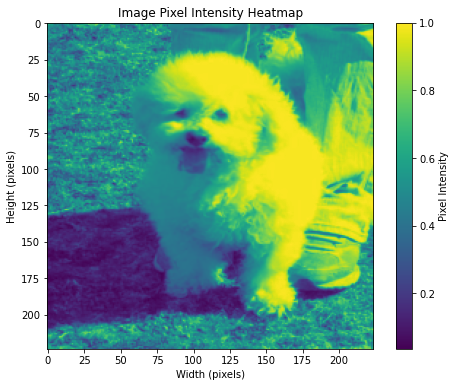

In [7]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# File path (updated to a dog image)
file_path = r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.11997.jpg"  # Update with the correct path

# Define transformations (resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to (224, 224)
    transforms.ToTensor()           # Convert to tensor
])

# Load the image
img = Image.open(file_path)
img_tensor = transform(img)

# Convert to grayscale for single-channel visualization
gray_img = img_tensor.mean(dim=0).numpy()  # Average over RGB channels to create a grayscale image

# Plot the grayscale image as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis")  # Use a colormap
plt.colorbar(label="Pixel Intensity")  # Add a colorbar
plt.title("Image Pixel Intensity Heatmap")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()


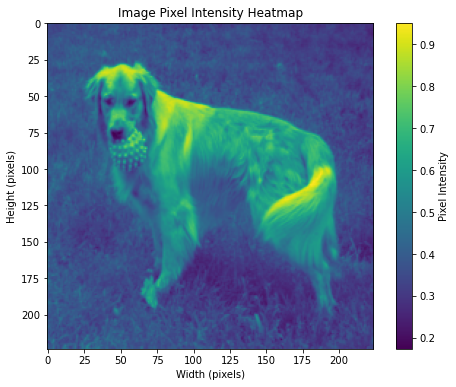

Matrix form of the grayscale image:
[[0.37254906 0.35947716 0.36601308 ... 0.28104576 0.28627452 0.29411766]
 [0.3529412  0.35555556 0.36601308 ... 0.2771242  0.28104576 0.28627452]
 [0.32418302 0.3398693  0.351634   ... 0.28235295 0.2784314  0.2771242 ]
 ...
 [0.46535948 0.3751634  0.3777778  ... 0.33333334 0.32026145 0.33333334]
 [0.39084968 0.39477125 0.37908497 ... 0.34901965 0.3385621  0.33071896]
 [0.36862746 0.40261438 0.39738563 ... 0.3411765  0.34901965 0.3372549 ]]


In [3]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# File path (updated to a dog image)
file_path = r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.66.jpg"  # Update with the correct path

# Define transformations (resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to (224, 224)
    transforms.ToTensor()           # Convert to tensor
])

# Load the image
img = Image.open(file_path)
img_tensor = transform(img)

# Convert to grayscale for single-channel visualization
gray_img = img_tensor.mean(dim=0).numpy()  # Average over RGB channels to create a grayscale image

# Plot the grayscale image as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis")  # Use a colormap
plt.colorbar(label="Pixel Intensity")  # Add a colorbar
plt.title("Image Pixel Intensity Heatmap")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

# Display the matrix form of the grayscale image
print("Matrix form of the grayscale image:")
print(gray_img)


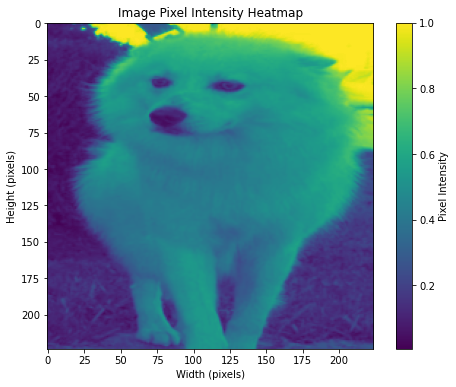

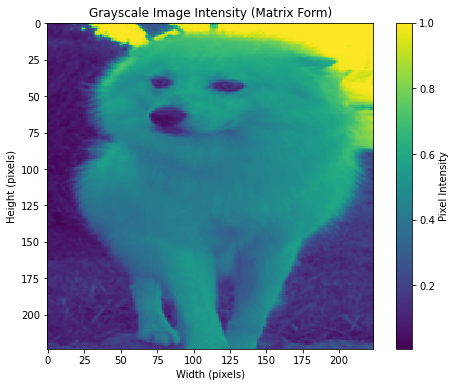

In [5]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# File path (updated to a dog image)
file_path = r"C:\Users\Famida\Desktop\archive\dogscats\dogscats\train\dogs\dog.31.jpg"  # Update with the correct path

# Define transformations (resize and convert to tensor)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to (224, 224)
    transforms.ToTensor()           # Convert to tensor
])

# Load the image
img = Image.open(file_path)
img_tensor = transform(img)

# Convert to grayscale for single-channel visualization
gray_img = img_tensor.mean(dim=0).numpy()  # Average over RGB channels to create a grayscale image

# Plot the grayscale image as a heatmap
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis")  # Use a colormap
plt.colorbar(label="Pixel Intensity")  # Add a colorbar
plt.title("Image Pixel Intensity Heatmap")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()

# Optionally, if you want the matrix to be shown as a graph:
plt.figure(figsize=(8, 6))
plt.imshow(gray_img, cmap="viridis", interpolation='nearest')  # 'nearest' interpolation for clear pixels
plt.colorbar(label="Pixel Intensity")  # Colorbar for pixel values
plt.title("Grayscale Image Intensity (Matrix Form)")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.show()


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


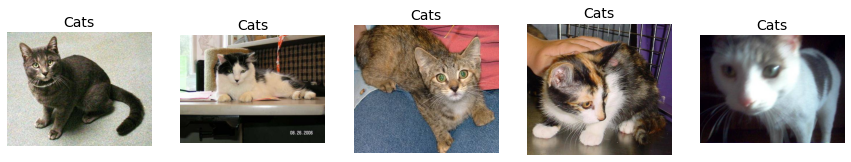

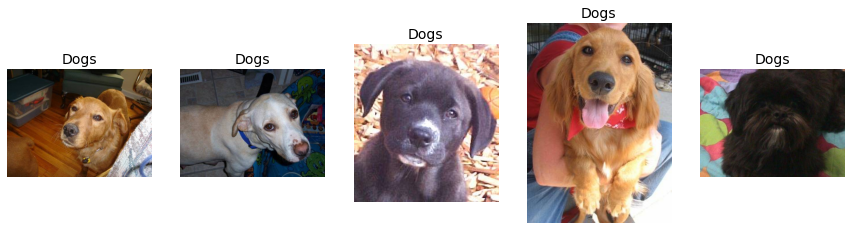

In [7]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Create a new figure for each category
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(image_files, 1):
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, num_images, i)  # Arrange in a row of `num_images`
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}", fontsize=14)
            
            # Display the images for the current category
            plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=5)


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


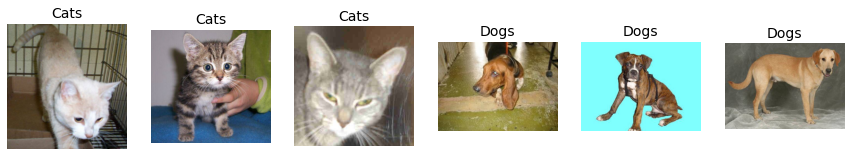

In [10]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    # Create a single figure for all categories to display images in a row
    plt.figure(figsize=(15, 5))  # Adjust the figure size for better visibility
    
    image_count = 1  # Counter for images across all categories

    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Loop through images in the category and display them in a single row
            for img_file in image_files:
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, len(categories) * num_images, image_count)  # Adjust to fit all images in one row
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}", fontsize=14)
                image_count += 1  # Move to the next image in the line
    
    # Display the images in a single line
    plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=3)


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


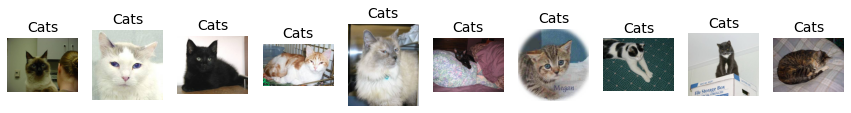

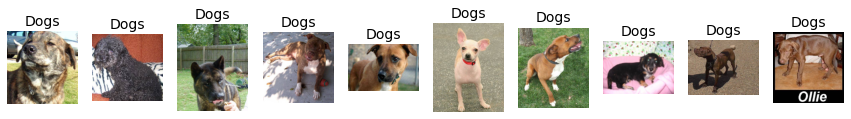

In [12]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Create a new figure for each category
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(image_files, 1):
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, num_images, i)  # Arrange in a row of `num_images`
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}", fontsize=14)
            
            # Display the images for the current category
            plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=10)


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


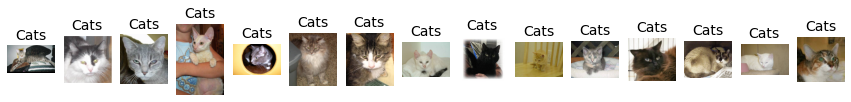

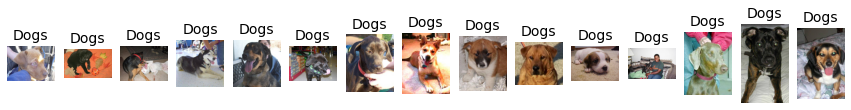

In [13]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Create a new figure for each category
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(image_files, 1):
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, num_images, i)  # Arrange in a row of `num_images`
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}", fontsize=14)
            
            # Display the images for the current category
            plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=15)


Using base directory: C:\Users\Famida\Desktop\archive\dogscats\train


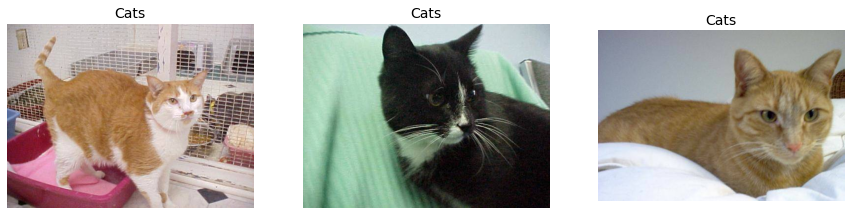

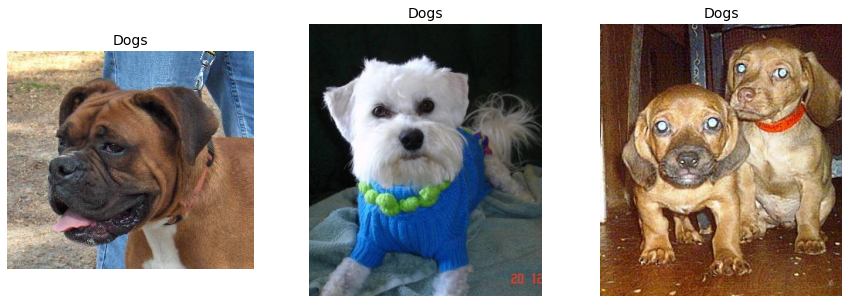

In [50]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Make sure TRAIN_PATH points to the correct directory
TRAIN_PATH = r"C:\Users\Famida\Desktop\archive\dogscats\train"

def visualize_random_photos(base_dir, num_images=5):
    # Ensure the path is correct
    print(f"Using base directory: {base_dir}")
    
    # Get the list of categories (e.g., 'cats' and 'dogs')
    categories = os.listdir(base_dir)
    
    for category in categories:
        category_path = os.path.join(base_dir, category)
        
        # Make sure the category directory exists
        if os.path.isdir(category_path):
            image_files = random.sample(os.listdir(category_path), num_images)
            
            # Create a new figure for each category
            plt.figure(figsize=(15, 5))
            for i, img_file in enumerate(image_files, 1):
                img_path = os.path.join(category_path, img_file)
                plt.subplot(1, num_images, i)  # Arrange in a row of `num_images`
                plt.imshow(mpimg.imread(img_path))
                plt.axis("off")  # Remove axis
                plt.title(f"{category.capitalize()}", fontsize=14)
            
            # Display the images for the current category
            plt.show()

# Visualize images
visualize_random_photos(TRAIN_PATH, num_images=3)
